In [1]:
from IPython.display import HTML

In [2]:
HTML("""
<style>
    #notebook-container {
    width: 80% !important;
}
.dataTable {
    width: 100% !important;
}
.dataTables_scrollBody {
    width: 100% !important;
}
.dataTables_scrollHead {
    width: 100% !important;
}
.dataTables_filter {
   float: right !important;
}
.output_html {
    max-width: calc(100%) !important;
}
.rendered{
    font-size: 125%;
}
</style>
""")

In [3]:
html1 = '<img src="https://images.theconversation.com/files/45159/original/rptgtpxd-1396254731.jpg" width="900" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

# A quick analysis of my reading habits

* What do I read the most?
* What format do I prefer?
* Are there any Genre-Sub-Genre pairs I tend to gravitate towards?
* Who is my most read author?
* How long does it take me to read books?

In [4]:
import pandas as pd
import seaborn as sns
import plot

df = pd.read_csv('BookList.csv')

#removes any blank rows or books I never finished/rated
df = df[df['Rating'].notnull()]

# convert columns to correct (or better) data types
df[['Year', 'Pages']] = df[['Year', 'Pages']].apply(pd.to_numeric, downcast='integer')
df['Duration'] = df['Duration'].apply(pd.to_numeric, downcast='integer')
df['Rating'] = df['Rating'].apply(pd.to_numeric, downcast='float')
df['Start Date']= pd.to_datetime(df['Start Date'])
df['Finish Date']= pd.to_datetime(df['Finish Date'])
df.tail()

,Title,Author,Publisher,Genre,Sub-Genre,Year,Pages,Format,Start Date,Finish Date,Duration,Rating
61,1Q84 - Part 1,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,387,Physical,2024-04-15,2024-04-23,9.0,7.5
62,1Q84 - Part 2,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,352,Physical,2024-04-23,2024-04-30,8.0,7.5
63,1Q84 - Part 3,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,418,Physical,2024-04-30,2024-05-09,10.0,8.0
64,The Wisdom of Insecurity,Alan Watts,Vintage,Philosophy,Nonfiction,1951,152,Physical,2024-05-09,2024-05-15,7.0,7.0
65,The Order of Time,Carlo Rovelli,Riverhead Books,Science,Nonfiction,2018,212,Physical,2024-05-16,2024-05-22,7.0,7.5


### Genre Count

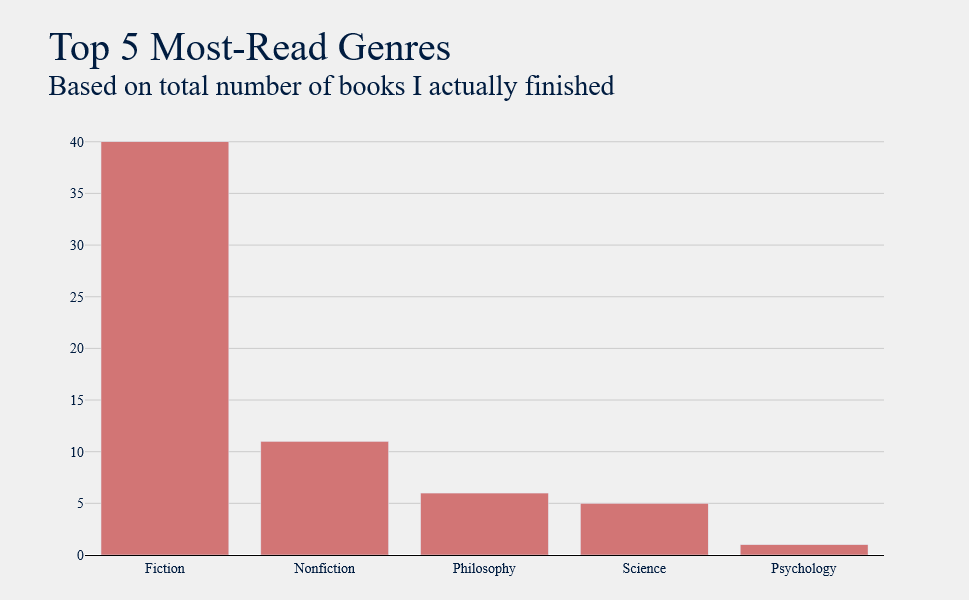

In [5]:
title = "Top 5 Most-Read Genres"
sub = f"Based on total number of books I actually finished"

plot.gen_bar_graph(df, 'Genre', title, sub, color="#d27575")

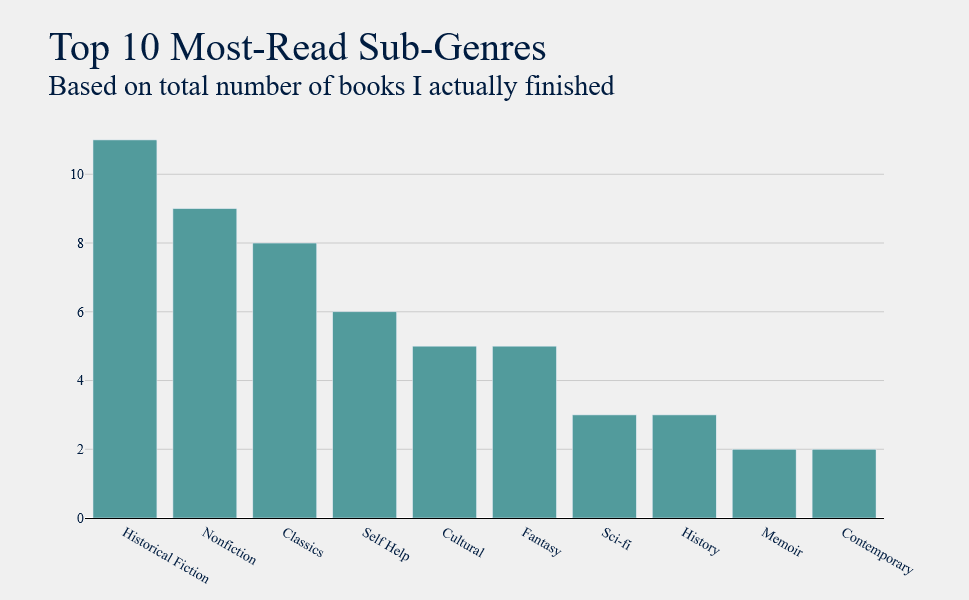

In [6]:
title = "Top 10 Most-Read Sub-Genres"
sub = f"Based on total number of books I actually finished"

plot.gen_bar_graph(df, 'Sub-Genre', title, sub, 10, color="#529b9c")

In [7]:
#df[df.isna().any(axis=1)]

### Most Common Genre-Sub-Genre Pairing

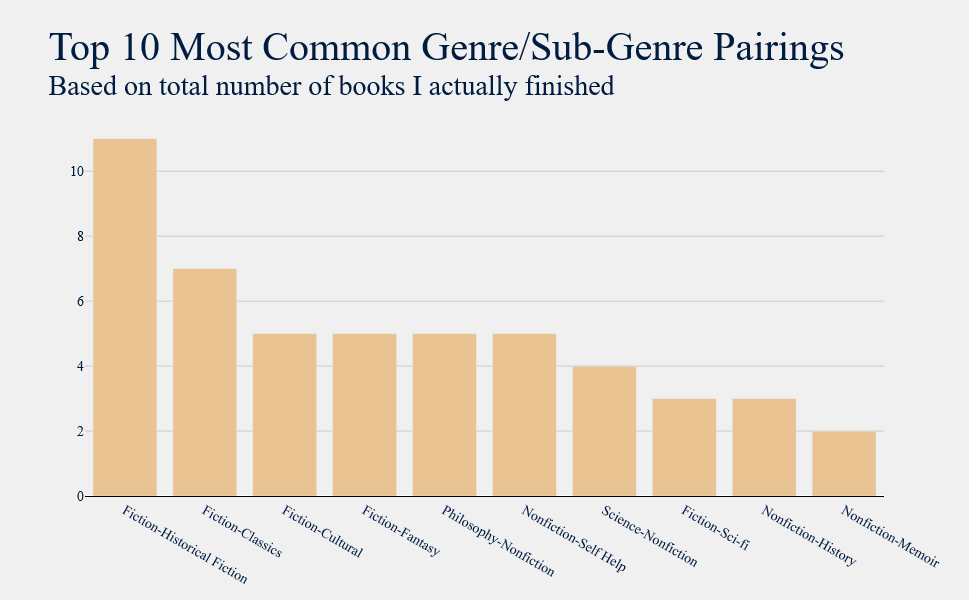

In [8]:
title = "Top 10 Most Common Genre/Sub-Genre Pairings"
sub = f"Based on total number of books I actually finished"

df['Genre Pair'] = df['Genre'] + '-' + df['Sub-Genre']
plot.gen_bar_graph(df, 'Genre Pair', title, sub, num=10, color="#eac392")

### Most-Read Author

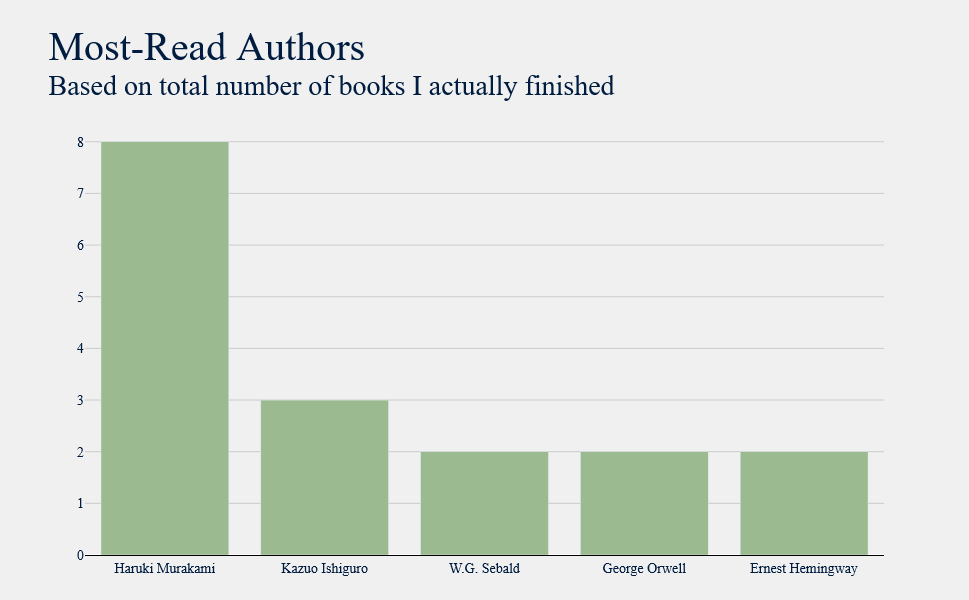

In [9]:
title = "Most-Read Authors"
sub = f"Based on total number of books I actually finished"
plot.gen_bar_graph(df, 'Author', title, sub, color="#9cba8f")

In [10]:
physical = (df[df['Format'] == 'Physical'].groupby('Genre')['Title']
            .count()
            .reset_index()
            .rename(columns={'Title':'Physical'}))
ebook = (df[df['Format'] == 'eBook'].groupby('Genre')['Title']
         .count()
         .reset_index()
         .rename(columns={'Title':'eBook'}))

format_df = pd.concat([physical, ebook['eBook']], axis=1).fillna(0).set_index('Genre')
format_df = format_df.convert_dtypes()

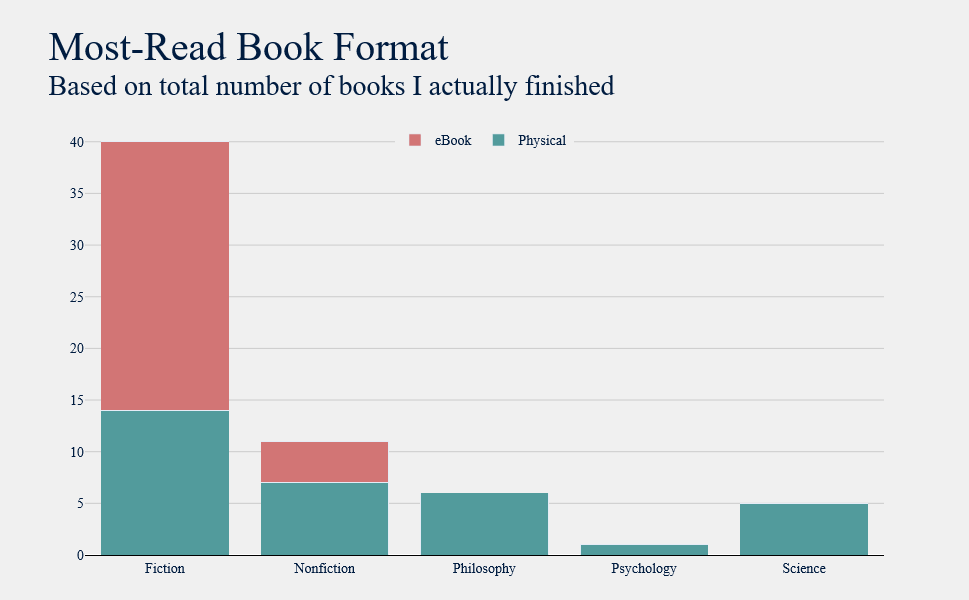

In [11]:
title = "Most-Read Book Format"
sub = f"Based on total number of books I actually finished"
plot.gen_stacked_bar_graph(format_df, title, sub)

### Ratings

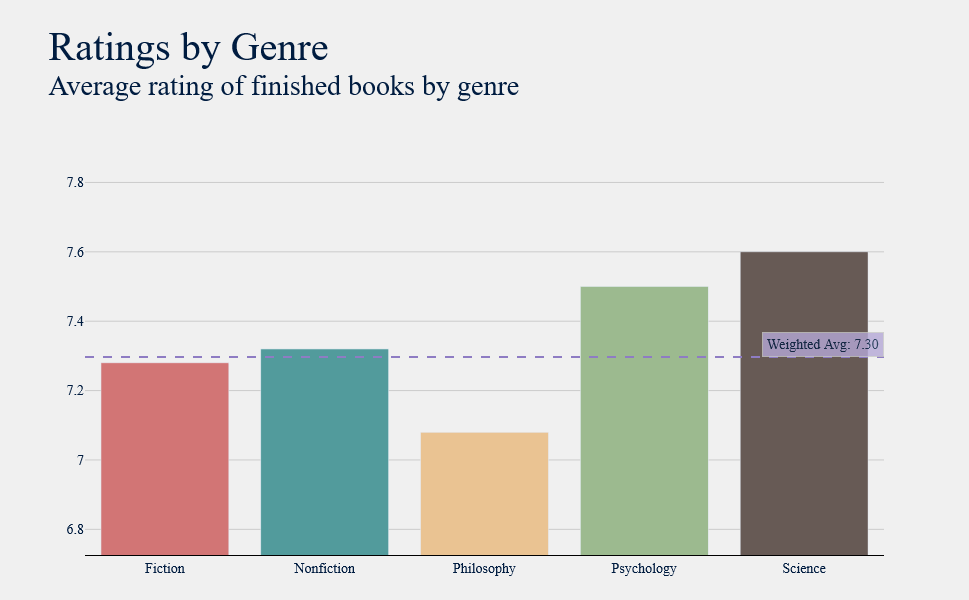

In [12]:
dfr = df.groupby('Genre')['Rating'].mean().reset_index().round(2)
dfr['Total'] = df.groupby('Genre')['Title'].count().reset_index(drop=True)
# dfr.loc[len(dfr.index)] = ['Overall', dfr['Rating'].mean()]
title = "Ratings by Genre"
sub = f"Average rating of finished books by genre"
plot.gen_bar_graph(dfr, 'Genre', title, sub, avg=True, w_avg='Rating')

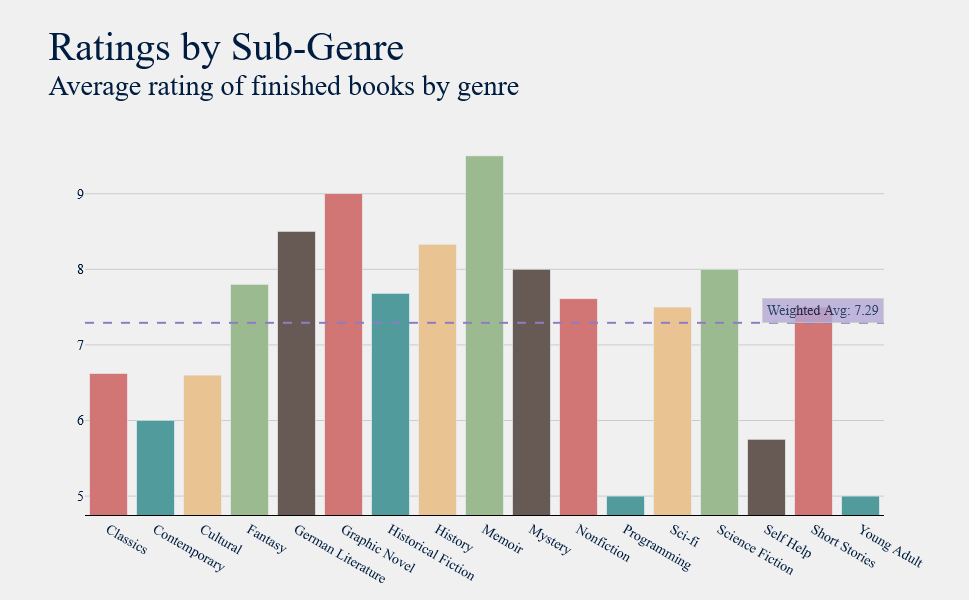

In [13]:
dfs = df.groupby('Sub-Genre')['Rating'].mean().reset_index().round(2)
dfs['Total'] = df.groupby('Sub-Genre')['Title'].count().reset_index(drop=True)
# dfs.loc[len(dfs.index)] = ['Overall', dfs['Rating'].mean()]
title = "Ratings by Sub-Genre"
sub = f"Average rating of finished books by genre"
plot.gen_bar_graph(dfs, 'Sub-Genre', title, sub, avg=True, w_avg='Rating')

### Durations

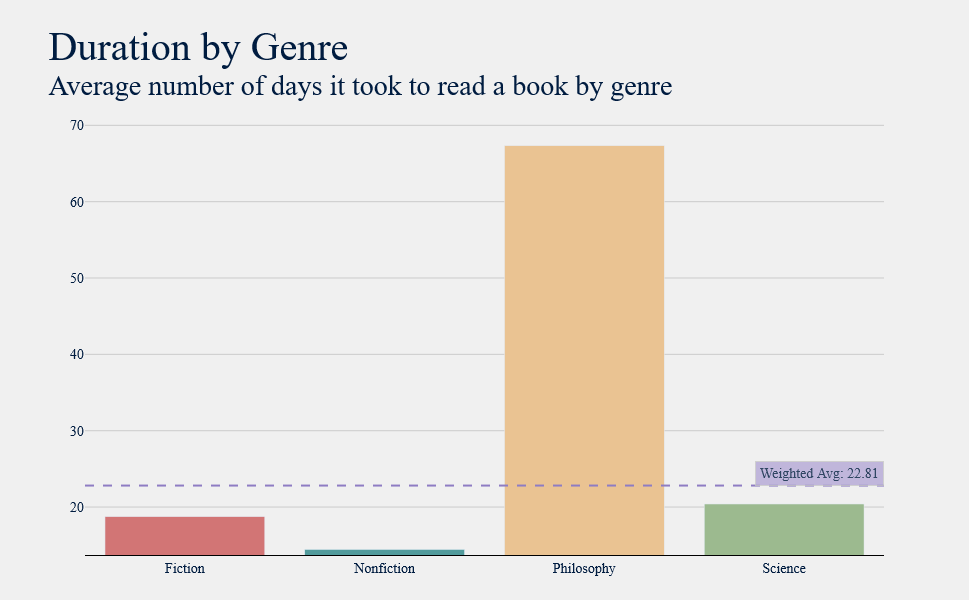

In [14]:
dft = df.groupby('Genre')['Duration'].mean().reset_index()
dft = dft[dft['Duration'].notnull()].round(2)
dft['Total'] = df.groupby('Genre')['Title'].count().reset_index(drop=True)
# dft.loc[len(dft.index)] = ['Overall', dft['Duration'].mean()]
title = "Duration by Genre"
sub = f"Average number of days it took to read a book by genre"
plot.gen_bar_graph(dft, 'Genre', title, sub, avg=True, w_avg='Duration')

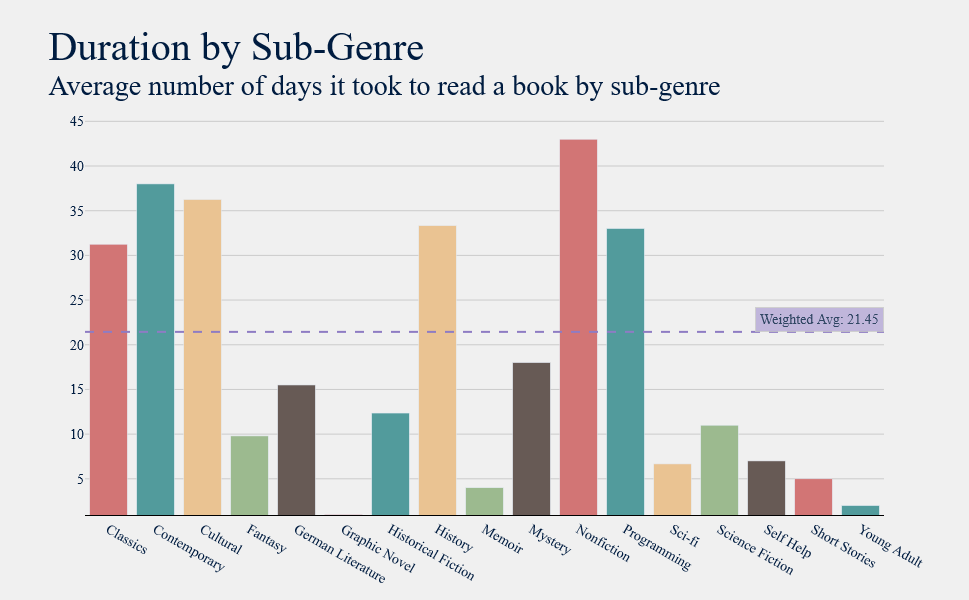

In [15]:
dfy = df.groupby('Sub-Genre')['Duration'].mean().reset_index()
dfy = dfy[dfy['Duration'].notnull()].round(2)
dfy['Total'] = df.groupby('Sub-Genre')['Title'].count().reset_index(drop=True)
title = "Duration by Sub-Genre"
sub = f"Average number of days it took to read a book by sub-genre"
plot.gen_bar_graph(dfy, 'Sub-Genre', title, sub, avg=True, w_avg='Duration')

In [16]:
# genres = [7.28, 7.32, 7.08, 7.50, 7.62]
# books = [40, 11, 6, 1, 4]
# genre_avg1 = np.average(genres, weights=books)
# print(f' Weighted Average with numpy: {genre_avg1}')

# dfq = pd.DataFrame()
# dfq['genres'] = pd.DataFrame(genres)
# dfq['books'] = pd.DataFrame(books)
# genre_avg2 = sum(dfq['genres'] * dfq['books']) / sum(dfq['books'])
# print(f'Weighted Average with pandas: {genre_avg2}')

In [17]:
#get list of unique genres/subgenres 
subgenres = df['Sub-Genre'].unique()
genres = df['Genre'].unique()

#create new, NaN-filled dataframe where rows=genres, and columns=subgenres
dfh = pd.DataFrame(np.nan, columns=subgenres, index=genres)

# grp = data grouped by the two columns you want as vertical & horizontal axes
grp = df[df["Genre"].isin(genres)].groupby(["Genre", "Sub-Genre"], as_index=False)['Title'].count()

#for each row in grp (which is the count of genre-sub-genre pairs), put the count (which is 'Title') in the corresponding row/column
for idx, row in grp.iterrows():
    dfh.loc[row["Genre"], row["Sub-Genre"]] = row['Title']
    
dfh.fillna(0, inplace=True)

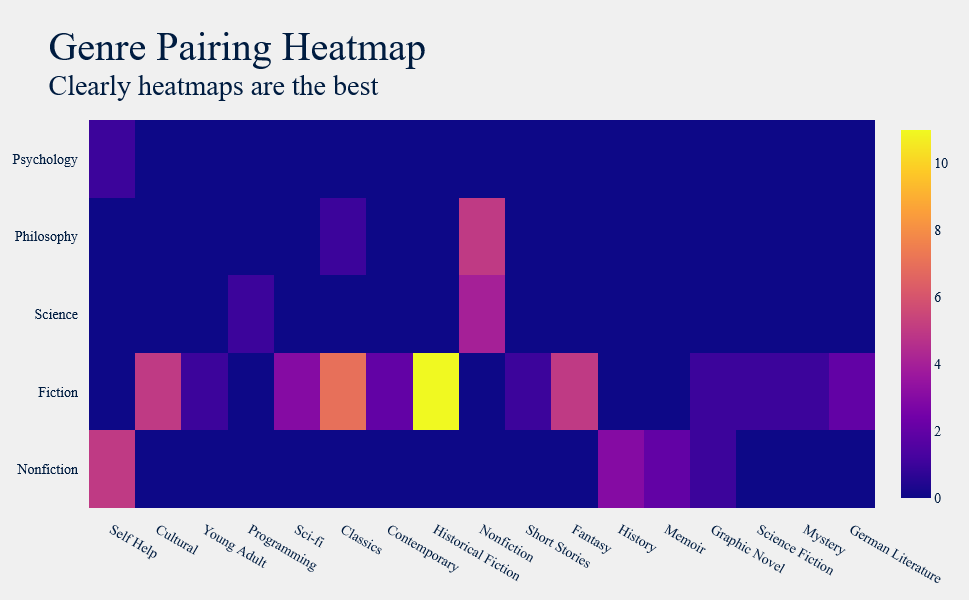

In [18]:
title = "Genre Pairing Heatmap"
sub = f"Clearly heatmaps are the best"
plot.gen_heatmap(dfh, title, sub)

## This is still a test to see if GitHub Pages is working correctly. More in-depth analysis to come soon!

In [19]:
# # Clean up space
#       - name: Remove unnecessary files
#         run: |
#           rm -rf /usr/share/dotnet
#           rm -rf /opt/ghc
#           rm -rf "/usr/local/share/boost"
#           rm -rf "$AGENT_TOOLSDIRECTORY"